<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/Assign7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados

In [ ]:
# montar o Google Drive dentro do Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# ler o arquivo processado de tédio
arquivo_tedio = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Assign6/dadosTedioProcessados.xlsx"
df_tedio = pd.read_excel(arquivo_tedio, index_col=0)

# remover as colunas female, male e [p1...p24]
df_tedio = df_tedio.drop(columns=['female', 'male', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
filtro  = df_tedio['game_id'] == 1
df_tedio = df_tedio[filtro]

# visualizar as 8 primeiras entradas do df
df_tedio.head(8)

,game_id,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy
0,1,6,1605708643465,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196
1,1,6,1605708643974,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284
2,1,6,1605708644480,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262
3,1,6,1605708644995,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635
4,1,6,1605708645496,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826
5,1,6,1605708646011,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499
6,1,6,1605708646525,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902
7,1,6,1605708647033,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097


In [ ]:
# verificar o tamanho do df
print("Variáveis:\t {}".format(df_tedio.shape[1]))
print("Entradas:\t {}".format(df_tedio.shape[0]))

Variáveis:	 9
Entradas:	 18278


In [ ]:
# vizualisar os nomes das colunas
df_tedio.columns

Index(['game_id', 'uuid', 'timestamp', 'angry', 'disgusted', 'fear', 'sad',
       'surprised', 'happy'],
      dtype='object')

In [ ]:
# descobrir os tipos das variáveis
df_tedio.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
dtype: object

## Correlação
De acordo com este [link](https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a)


*   1 a 0.7 (+ ou -): forte
*   0.7 a 0.5 (+ ou -): moderado
*   0.5 a 0.25 (+ ou -):fraco
*   próximo a 0 (+ ou -): nenhuma


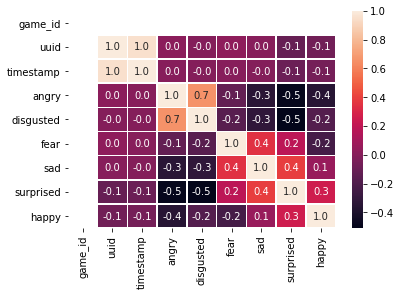

In [ ]:
# análise de correlação
correlation = df_tedio.corr()

# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

No gráfico acima temos:


*   angry x disgusted = 0.7 (forte)
*   angry x surprised = -0.5 (moderado)
*   surprised x disgusted = -0.5 (moderado)
*   surprised x fear = 0.4 (moderado)
*   sad x fear = 0.4 (moderado)

## Criando "classes" para a base de dados
Escolhemos quatro sentimentos que tem forte (*angry* e *disguted*) e moderada (*sad* e *surprised*) correlação.

In [ ]:
# função para classificar os dados como tédio (1) ou estresse (0)
def def_tedio(c):
  if c['angry'] >= 0.1 and c['disgusted'] >= 0.1:
    return 1
  elif c['sad'] >= 0.1 and c['surprised'] >= 0.1:
    return 1
  else:
    return 0

In [ ]:
# criar a coluna 'target' para o df_tedio
df_tratado = pd.DataFrame(df_tedio)

df_tratado['target'] = df_tedio.apply(def_tedio, axis=1)

df_tratado.head(8)

,game_id,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy,target
0,1,6,1605708643465,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196,1
1,1,6,1605708643974,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284,1
2,1,6,1605708644480,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262,1
3,1,6,1605708644995,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635,1
4,1,6,1605708645496,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826,1
5,1,6,1605708646011,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499,1
6,1,6,1605708646525,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902,1
7,1,6,1605708647033,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097,1


In [ ]:
# verificar o tipo de dado de cada coluna
df_tratado.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
target         int64
dtype: object

In [ ]:
# verificar que colunas tem valores NaN (Not a Number)
df_tratado.isnull().any()

game_id      False
uuid         False
timestamp    False
angry         True
disgusted     True
fear          True
sad           True
surprised     True
happy         True
target       False
dtype: bool

In [ ]:
# Completando os registros que tem valor NaN com 0.0
df_tratado = df_tratado.fillna(0.0)

## Conjunto de Dados para Treinamento e Teste

Dividir o conjunto de dados em 70% para treinamento e 30% para teste.

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_tratado.drop(columns=['target']), df_tratado.target, test_size=0.3)

# Classificador KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# criar uma instância do classificador KNN
clf_knn = KNeighborsClassifier()

# treinar o classficador
clf_knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
# computar a acurácia do treinamento
pred_knn = clf_knn.predict(X_teste)

print('Acurácia: ', accuracy_score(y_teste, pred_knn))

Acurácia:  0.8202042304886944


## Matriz de Confusão

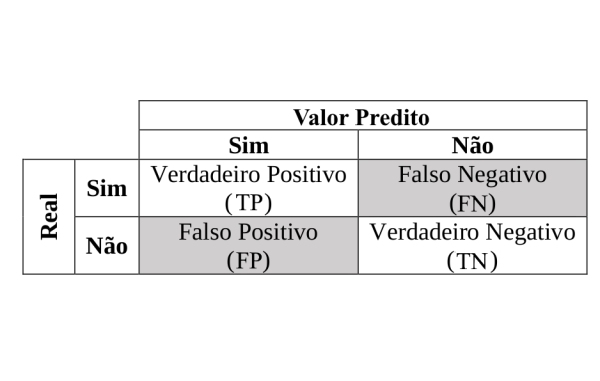

In [ ]:
from sklearn.metrics import confusion_matrix
# imprimir a matriz de confusão
confusion_matrix(y_teste, pred_knn)

array([[2738,  496],
       [ 490, 1760]])

## Curva ROC

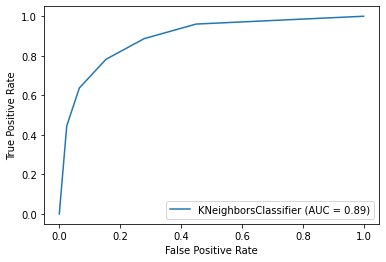

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_knn, X_teste, y_teste)  

## Gráfico de Dispersão

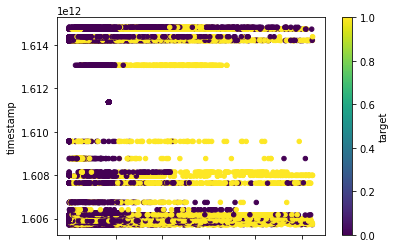

In [ ]:
# gerar gráfico de dispersão
ax2 = df_tratado.plot.scatter(x='angry',
                      y='timestamp',
                      c='target',
                      colormap='viridis')

## Comparação de Resultados



Nessa seção iremos realizar outra comparação utilizando especificamente o algoritmo [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

In [ ]:
# criar uma instância do classificador KNN com algoritmo BallTree
clf_knn_bt = KNeighborsClassifier(algorithm='ball_tree')

# treinar o classficador
clf_knn_bt.fit(X_treinamento, y_treinamento)

# computar a acurácia do treinamento com o novo algoritmo
pred_knn_bt = clf_knn_bt.predict(X_teste)

print('Acurácia: ', accuracy_score(y_teste, pred_knn_bt))

Acurácia:  0.8202042304886944


# Classificador Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# criar classificador gausseano
clf_gnb = GaussianNB()

# treinar o modelo usando conjuntos de treinamento
clf_gnb.fit(X_treinamento, y_treinamento)

# prever a resposta para o conjunto de teste
pred_gnb = clf_gnb.predict(X_teste)

## Acurácia

In [ ]:
from sklearn import metrics

# calcular a acurácia do modelo, quanto o classificador é correto?
print("Acurácia:",metrics.accuracy_score(y_teste, pred_gnb))

Acurácia: 0.5897155361050328


## Curva ROC

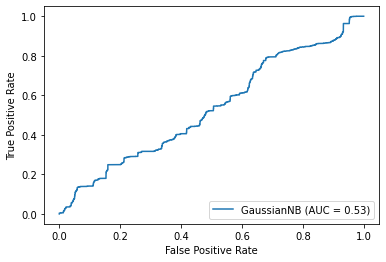

In [ ]:
metrics.plot_roc_curve(clf_gnb, X_teste, y_teste)  

# Classificador Ávore de Decisão

In [ ]:
from sklearn import tree

# instanciar um classificador de Árvore de Decisão
clf_dtc = tree.DecisionTreeClassifier()

In [ ]:
# treinar a árvore de decisão
clf_dtc.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# classificar (prever) saída
pred_dtc = clf_dtc.predict(X_teste)

print("Valor classificado como: ", clf_dtc.predict(X_teste))

Valor classificado como:  [1 1 1 ... 0 0 1]


## Acurácia

In [ ]:
print('Acurácia: ', accuracy_score(y_teste, pred_dtc))

Acurácia:  0.99981765134938


## Curva ROC

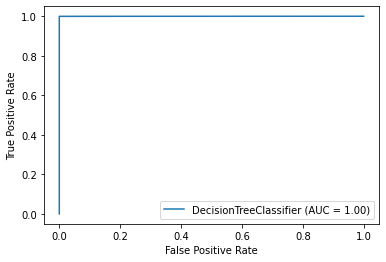

In [ ]:
plot_roc_curve(clf_dtc, X_teste, y_teste)  

[Text(200.88, 201.90857142857143, 'X[4] <= 0.108\ngini = 0.489\nsamples = 12794\nvalue = [7345, 5449]'),
 Text(111.6, 170.84571428571428, 'X[7] <= 0.1\ngini = 0.415\nsamples = 8801\nvalue = [6212, 2589]'),
 Text(44.64, 139.78285714285715, 'X[4] <= 0.1\ngini = 0.024\nsamples = 5328\nvalue = [5264, 64]'),
 Text(22.32, 108.72, 'gini = 0.0\nsamples = 5188\nvalue = [5188, 0]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 0.1\ngini = 0.496\nsamples = 140\nvalue = [76, 64]'),
 Text(44.64, 77.65714285714284, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(89.28, 77.65714285714284, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]'),
 Text(178.56, 139.78285714285715, 'X[6] <= 0.1\ngini = 0.397\nsamples = 3473\nvalue = [948, 2525]'),
 Text(156.24, 108.72, 'X[4] <= 0.108\ngini = 0.004\nsamples = 950\nvalue = [948, 2]'),
 Text(133.92000000000002, 77.65714285714284, 'X[4] <= 0.102\ngini = 0.002\nsamples = 949\nvalue = [948, 1]'),
 Text(111.6, 46.59428571428572, 'gini = 0.0\nsamples = 943\nvalue = [943, 

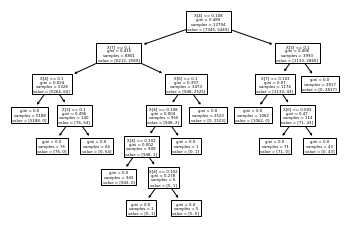

In [ ]:
# imprimir árvore montada pelo classificador
tree.plot_tree(clf_dtc)

In [ ]:
# imprimir a árvore de decisão criada pelo classificador em PDF
from sklearn.externals.six import StringIO
import pydot

nomes_atributo = list(df_tratado.columns[0:9])
nomes_classe = df_tratado.target

# conversão de lista de objetos numpy.int64 para lista de strings
nomes_classe=[str(x) for x in nomes_classe]

dot_data = StringIO()
tree.export_graphviz(clf_dtc,
                     out_file = dot_data,
                     feature_names=nomes_atributo,
                     class_names=nomes_classe,
                     filled=True,
                     rounded=True,
                     impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("game.pdf")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Classificador Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

# instanciar um classificador Perceptron
clf_perceptron = Perceptron(random_state=42,max_iter=10,tol=0.001)

# treinar o classificador
clf_perceptron.fit(X_treinamento, y_treinamento)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# prever utilizando o conjunto de dados de teste
pred_perceptron = clf_perceptron.predict(X_teste)
print(pred_perceptron)

[0 0 0 ... 0 0 0]


# Classificador MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# instanciar o classificador do tipo MLP com duas camadas ocultas com cinco neuronios cada
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

print(clf_mlp.fit(X_treinamento, y_treinamento))  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
# print("Pesos entre a entrada e a primeira camada oculta:")
# print(clf_mlp.coefs_[0])
# print("\nPesos entre a primeira camada oculta e a segunda camada oculta:")
# print(clf_mlp.coefs_[1])

In [ ]:
# print("w0 = ", clf_mlp.coefs_[0][0][0])
# print("w1 = ", clf_mlp.coefs_[0][1][0])

In [ ]:
# clf_mlp.coefs_[0][:,0]

In [ ]:
# imprimir os pesos de cada neuronio por camada
# for i in range(len(clf_mlp.coefs_)):
#     number_neurons_in_layer = clf_mlp.coefs_[i].shape[1]
#     for j in range(number_neurons_in_layer):
#         weights = clf_mlp.coefs_[i][:,j]
#         print(i, j, weights, end=", ")
#         print()
#     print()

In [ ]:
# print("Valores de limiar para a primeira camada oculta:")
# print(clf_mlp.intercepts_[0])
# print("\nValores de limiar para a segunda camada oculta:")
# print(clf_mlp.intercepts_[1])

In [ ]:
# Fazer a classificação para o conjunto X_teste
pred_mlp = clf_mlp.predict(X_teste)

print(pred_mlp)

[0 0 0 ... 0 0 0]


In [ ]:
pred_probabilidade = clf_mlp.predict_proba(X_teste)
print(pred_probabilidade)

[[0.57409895 0.42590105]
 [0.57409895 0.42590105]
 [0.57409895 0.42590105]
 ...
 [0.57409895 0.42590105]
 [0.57409895 0.42590105]
 [0.57409895 0.42590105]]


## Acurácia

In [ ]:
print('Acurácia: ', accuracy_score(y_teste, pred_mlp))

Acurácia:  0.5897155361050328


## Curva ROC

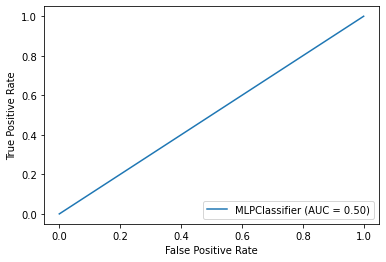

In [ ]:
metrics.plot_roc_curve(clf_mlp, X_teste, y_teste)  

# Agrupamento

Referências:


*   [Algoritmo K-means: Aprenda essa Técnica Essêncial através de Exemplos Passo a Passo com Python](https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/)
*   [Capítulo 4 Análise de agrupamento de dados](https://edisciplinas.usp.br/pluginfile.php/4109668/mod_resource/content/2/mineracaodadosbiologicos-parte4-completo.pdf)
*   [K-means: o que é, como funciona, aplicações e exemplo em Python](https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572)
*   [Passo a passo para entender o agrupamento e implementação de K-means com sklearn](https://ichi.pro/pt/passo-a-passo-para-entender-o-agrupamento-e-implementacao-de-k-means-com-sklearn-199389628144086)
*   [Agrupando dados com Python](https://www.alura.com.br/artigos/agrupando-dados-com-python)



## K-Means

In [ ]:
from sklearn.cluster import KMeans

dados = df_tratado.iloc[:,0:8].values

ctr_kmeans = KMeans()
labels = ctr_kmeans.fit_predict(dados)


In [ ]:
# mostra a coordenadas dos centróides dos clusters
ctr_kmeans.cluster_centers_

array([[1.00000000e+00, 1.09736397e+02, 1.60771993e+12, 9.40676705e-02,
        1.03398113e-01, 2.96500806e-02, 1.92516296e-01, 7.37017206e-02],
       [1.00000000e+00, 2.28785860e+02, 1.61474774e+12, 1.03747494e-01,
        1.00324656e-01, 4.34896341e-02, 1.58105305e-01, 7.48598695e-02],
       [1.00000000e+00, 3.81087658e+01, 1.60582335e+12, 1.06501737e-01,
        1.23248934e-01, 3.88713202e-02, 1.76770870e-01, 1.16208600e-01],
       [1.00000000e+00, 1.50496164e+02, 1.61306566e+12, 1.45740849e-01,
        2.44502658e-01, 9.09667206e-03, 8.39592741e-02, 6.46554385e-03],
       [1.00000000e+00, 1.88417290e+02, 1.61423588e+12, 1.07303453e-01,
        1.00548193e-01, 4.50878564e-02, 1.82177312e-01, 1.23685826e-01],
       [1.00000000e+00, 1.25488064e+02, 1.60915300e+12, 6.66686026e-02,
        8.50054177e-02, 6.35995602e-02, 1.25176259e-01, 1.12533237e-01],
       [1.00000000e+00, 7.98487947e+01, 1.60625407e+12, 1.15759214e-01,
        9.46426001e-02, 5.71055351e-02, 1.20339815e-01, 1.

In [ ]:
# calcula a clusterização e transforma os dados em espaço cluster X distância
distancia = ctr_kmeans.fit_transform(dados)
distancia

array([[9.03909506e+09, 5.45427636e+08, 2.01128507e+09, ...,
        8.52723314e+09, 3.44435593e+09, 5.65369862e+09],
       [9.03909455e+09, 5.45427126e+08, 2.01128456e+09, ...,
        8.52723263e+09, 3.44435542e+09, 5.65369811e+09],
       [9.03909404e+09, 5.45426621e+08, 2.01128405e+09, ...,
        8.52723212e+09, 3.44435492e+09, 5.65369761e+09],
       ...,
       [7.06099992e+07, 8.56427742e+09, 7.09841999e+09, ...,
        5.82471920e+08, 5.66534912e+09, 3.45600643e+09],
       [7.06105352e+07, 8.56427796e+09, 7.09842053e+09, ...,
        5.82472456e+08, 5.66534966e+09, 3.45600697e+09],
       [7.06110636e+07, 8.56427848e+09, 7.09842105e+09, ...,
        5.82472983e+08, 5.66535019e+09, 3.45600750e+09]])

In [ ]:
# mostra a classe de cada ponto
ctr_kmeans.labels_

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

## Método Elbow
O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k. <br/>
Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters. <br/>
É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho.

1 2.872787017752153e+23
2 1.1153817869190146e+22
3 3.8801118283128793e+21
4 2.723356857423655e+21
5 1.4237442761109912e+21
6 1.1031133939450707e+21
7 7.51563977795056e+20
8 4.878726016493937e+20
9 5.530332000439557e+20
10 1.8705581961329843e+20


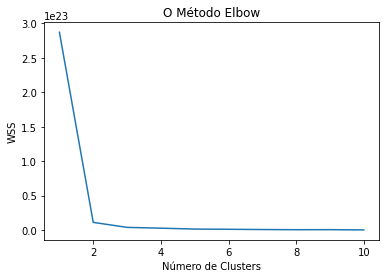

In [ ]:
# within cluster sum of squares
wcss = []
 
for i in range(1, 11):
    ctr_kmeans = KMeans(n_clusters = i, init = 'random')
    ctr_kmeans.fit(dados)
    print(i,ctr_kmeans.inertia_)
    wcss.append(ctr_kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Visualizando os grupos

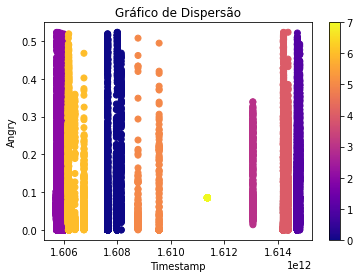

In [ ]:
# gráfico de dispersão entre timestamp x angry
sc = plt.scatter(dados[:, 2], dados[:, 3], c=labels, cmap='plasma')
plt.colorbar(sc)
plt.title("Gráfico de Dispersão")
plt.xlabel("Timestamp")
plt.ylabel("Angry")
plt.show()

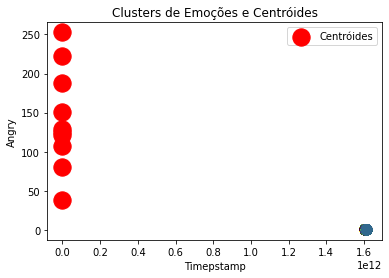

In [ ]:
# gráfico de dispersão com os centróides
plt.scatter(dados[:, 2], dados[:,3], s = 100, c = ctr_kmeans.labels_)
plt.scatter(ctr_kmeans.cluster_centers_[:, 0], ctr_kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centróides')
plt.title('Clusters de Emoções e Centróides')
plt.xlabel('Timepstamp')
plt.ylabel('Angry')
plt.legend()

plt.show()

## Medidas de (dis)similaridade

In [ ]:
from scipy.spatial.distance import pdist, squareform

# 'pdist' calcula as distancias entre todos os pares possiveis de objetos.
# O parametro 'metric' define qual medida de (dis)similaridade sera calculada.
distancias = pdist(dados, metric='euclidean')
# O metodo 'pdist' retorna um numpy.array contendo
# n * (n - 1) / 2 elementos. Para transforma-lo em

# um numpy.array de dimensao n x n pode-se utilizar
# o metodo 'squareform'.
distancias = squareform(distancias)
distancias

array([[0.00000000e+00, 5.09000006e+02, 1.01500000e+03, ...,
        9.10970506e+09, 9.10970559e+09, 9.10970612e+09],
       [5.09000006e+02, 0.00000000e+00, 5.06000006e+02, ...,
        9.10970455e+09, 9.10970508e+09, 9.10970561e+09],
       [1.01500000e+03, 5.06000006e+02, 0.00000000e+00, ...,
        9.10970404e+09, 9.10970458e+09, 9.10970510e+09],
       ...,
       [9.10970506e+09, 9.10970455e+09, 9.10970404e+09, ...,
        0.00000000e+00, 5.37000001e+02, 1.06400000e+03],
       [9.10970559e+09, 9.10970508e+09, 9.10970458e+09, ...,
        5.37000001e+02, 0.00000000e+00, 5.27000001e+02],
       [9.10970612e+09, 9.10970561e+09, 9.10970510e+09, ...,
        1.06400000e+03, 5.27000001e+02, 0.00000000e+00]])

## Single-Linkage (Pacote Scipy)

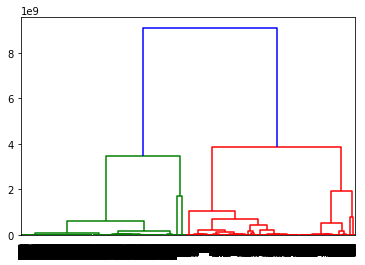

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

# carregando blobs.csv sem a coluna 'label'

#dados = pandas.read_csv('blobs.csv', usecols=[0, 1])

# O metodo 'linkage' recebe como entrada um numpy.array.

# O atributo 'values' de um pandas.DataFrame retorna
# seus valores em tal formato.

#dados = dados.values

# Aplicando o agrupamento hierarquico aos dados.
# O parametro 'method' define qual algoritmo sera
# utilizado.
# Varios metodos de agrupamento estao disponiveis. Para
# os exemplos deste material sera utilizado
# method='average', method='complete' ou
# method='single'.
# O parametro 'metric' define a medida de
# (dis)similaridade a ser utilizada. Para uma lista
# de medidas disponiveis recomenda-se a documentacao
# do metodo scipy.spatial.distance.pdist.

h = linkage(dados, method='complete', metric='euclidean')

# Para plotar o dendrograma utiliza-se o metodo
# 'dendrogram'.

dendrogram(h)
plt.show()


## Single-Linkage (Pacote Sci-Kit Learn)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(dados)
clustering.labels_

array([0, 0, 0, ..., 1, 1, 1])

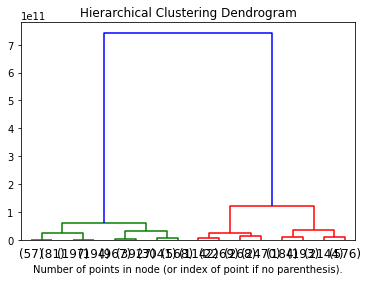

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(dados)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import dbscan

# carregando blobs.csv sem a coluna 'label'

#dados = pd.read_csv('blobs.csv', usecols=[0, 1])

# O metodo 'dbscan' recebe como entrada um numpy.array.
# O atributo 'values' de um pandas.DataFrame retorna
# seus valores em tal formato.

#dados = dados.values

# Executa o algoritmo DBSCAN.
# 'eps' eh o parametro que define o raio de cada objeto.
# 'min_samples' indica a quantidade minima de objetos
# para considerar um objeto como central.
# 'metric' define a medida de distancia a ser utilizada
# e, seu valor padrao consiste na distancia euclidiana.
# O metodo retorna dois valores:
# o primeiro eh um numpy.array contendo os indices
# dos objetos classificados como centrais;
# o segundo eh um numpy.array contendo o rotulo de
# grupo de cada objeto
objetos_centrais, labels_dbscan = dbscan(dados, eps=1.5, min_samples=3)

No handles with labels found to put in legend.


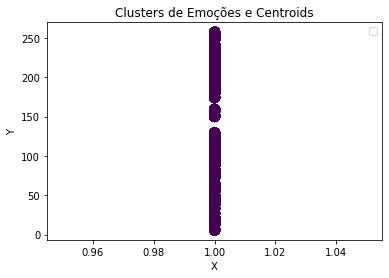

In [ ]:
plt.scatter(dados[:, 0], dados[:,1], s = 100, c = labels_dbscan)
#plt.scatter(objetos_centrais[:, 0], objetos_centrais[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Clusters de Emoções e Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

## Largura de silhueta (LS)

In [ ]:
from sklearn.metrics import silhouette_score

# Executando o algoritmo k-means.
ctr_kmeans = KMeans(n_clusters=3,init='random',n_init=100)
ctr_kmeans.fit_predict(dados)
centroides = ctr_kmeans.cluster_centers_
rotulos = ctr_kmeans.labels_

# Calculando a largura de silhueta.
# O primeiro parametro eh o conjunto de dados estudado.
# O segundo engloba os rotulos encontrados por um algoritmo.
# O parametro 'metric' indica a medida de distancia
# utilizada. No caso do algoritmo k-means, sera informado
# 'sqeuclidean' que eh a distancia euclidiana ao
# quadrado.
s = silhouette_score(dados, rotulos, metric='sqeuclidean')
s

0.9534954195770271

# Variando os parâmetros do KMeans

## Inicializando variações

In [ ]:
ctr_kmeans_variation_v1 = KMeans(n_clusters=2, max_iter=100)
ctr_kmeans_variation_v2 = KMeans(n_clusters=2, max_iter=200)
ctr_kmeans_variation_v3 = KMeans(n_clusters=2, max_iter=300)
ctr_kmeans_variation_v4 = KMeans(n_clusters=5, max_iter=100)
ctr_kmeans_variation_v5 = KMeans(n_clusters=5, max_iter=200)
ctr_kmeans_variation_v6 = KMeans(n_clusters=5, max_iter=300)

labels_variation_v1 = ctr_kmeans_variation_v1.fit_predict(dados)
labels_variation_v2 = ctr_kmeans_variation_v2.fit_predict(dados)
labels_variation_v3 = ctr_kmeans_variation_v3.fit_predict(dados)
labels_variation_v4 = ctr_kmeans_variation_v4.fit_predict(dados)
labels_variation_v5 = ctr_kmeans_variation_v5.fit_predict(dados)
labels_variation_v6 = ctr_kmeans_variation_v6.fit_predict(dados)

## Visualizando os grupos das variações do algoritmo de clusterização

### Com 2 Clusters e 100 Iterações

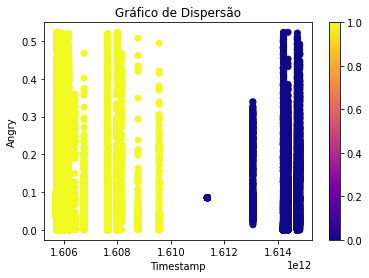

In [ ]:
sc = plt.scatter(dados[:, 2], dados[:, 3], c=labels_variation_v1, cmap='plasma')
plt.colorbar(sc)
plt.title("Gráfico de Dispersão")
plt.xlabel("Timestamp")
plt.ylabel("Angry")
plt.show()

### Com 2 Clusters e 200 Iterações

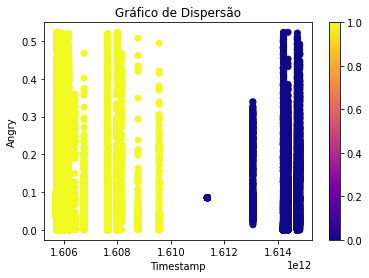

In [ ]:
sc = plt.scatter(dados[:, 2], dados[:, 3], c=labels_variation_v2, cmap='plasma')
plt.colorbar(sc)
plt.title("Gráfico de Dispersão")
plt.xlabel("Timestamp")
plt.ylabel("Angry")
plt.show()

### Com 2 Clusters e 300 Iterações

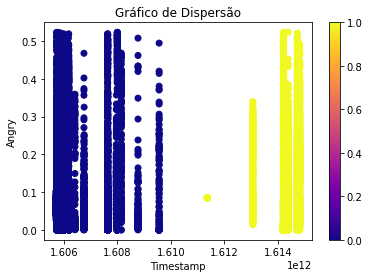

In [ ]:
sc = plt.scatter(dados[:, 2], dados[:, 3], c=labels_variation_v3, cmap='plasma')
plt.colorbar(sc)
plt.title("Gráfico de Dispersão")
plt.xlabel("Timestamp")
plt.ylabel("Angry")
plt.show()

### Com 5 Clusters e 100 Iterações

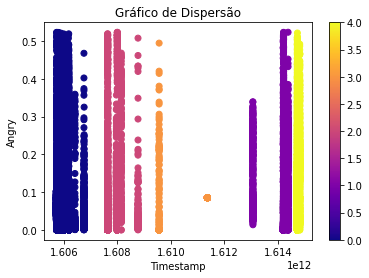

In [ ]:
sc = plt.scatter(dados[:, 2], dados[:, 3], c=labels_variation_v4, cmap='plasma')
plt.colorbar(sc)
plt.title("Gráfico de Dispersão")
plt.xlabel("Timestamp")
plt.ylabel("Angry")
plt.show()

### Com 5 Clusters e 200 Iterações

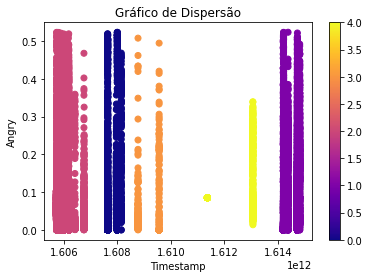

In [ ]:
sc = plt.scatter(dados[:, 2], dados[:, 3], c=labels_variation_v5, cmap='plasma')
plt.colorbar(sc)
plt.title("Gráfico de Dispersão")
plt.xlabel("Timestamp")
plt.ylabel("Angry")
plt.show()

### Com 5 Clusters e 300 Iterações

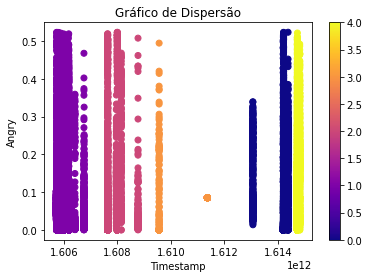

In [ ]:
sc = plt.scatter(dados[:, 2], dados[:, 3], c=labels_variation_v6, cmap='plasma')
plt.colorbar(sc)
plt.title("Gráfico de Dispersão")
plt.xlabel("Timestamp")
plt.ylabel("Angry")
plt.show()